<a href="https://colab.research.google.com/github/fundaylncii/FeatureEngineering/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## verideki genel eğilimin oldukça dışına çıkan değerler
## lower value = Q1 - 1,5 * IQR
## upper value = Q3 + 1,5 * IQR

In [ ]:
## Aykırı Değerlerin Yakalanması
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics  import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler


In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_row",None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)

In [ ]:
## Büyük ölçekli veri
def loat_application_train():
  data = pd.read_csv("/content/application_train.csv")
  return data

In [ ]:
df = loat_application_train()
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
## Küçük ölçekli veri
def load():
  data = pd.read_csv("/content/titanic.csv")
  return data

In [ ]:
df = load()
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,NaN,C


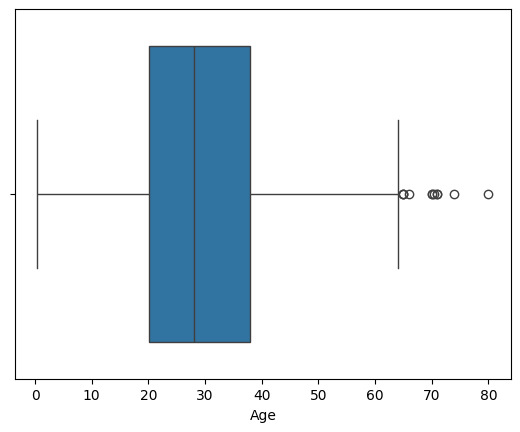

In [ ]:
## Grafik Teknikle Aykırı Değerler
sns.boxplot(x=df["Age"])
plt.show()

In [ ]:
## Aykırı değerler tespiti
q1 = df["Age"].quantile(0.25)
print(q1)
q3 = df["Age"].quantile(0.75)
print(q3)
iqr = q3 - q1
print(iqr)

20.125
38.0
17.875


In [ ]:
low = q1 - 1.5 * iqr
print(low)
up = q3 + 1.5 * iqr
print(up)

-6.6875
64.8125


In [ ]:
## aykırı değerler
df[(df["Age"] < low) | (df["Age"] > up)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q


In [ ]:
## aykırı değerlerin index bilgisi
df[(df["Age"] < low) | (df["Age"] > up)].index

Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [ ]:
## aykırı değer var mı yok mu ?

df[(df["Age"] < low) | (df["Age"] > up)].any(axis=None)

True

In [ ]:
## Fonksiyonlaştırma

def outlier_threshold (dataframe, col_name, q1=0.25, q3=0.75):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquantile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquantile_range
  low_limit = quartile1 - 1.5 * interquantile_range
  return low_limit, up_limit


In [ ]:
outlier_threshold(df,"Age")

(-6.6875, 64.8125)

In [ ]:
low, up = outlier_threshold(df,"Age")


In [ ]:
def check_outlier(dataframe, col_name):
  low_limit , up_limit =  outlier_threshold(dataframe,col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [ ]:
check_outlier(df, "Age")

True

In [ ]:
## Veri seti içerisindeki numerik, categorik değişkenlerin tespit edilmesi

def grap_col_names(dataframe, cat_th= 10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

In [ ]:
## titanic veri seti için
cat_cols, num_cols, cat_but_car = grap_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [ ]:
print(cat_cols)
print(num_cols)
print(cat_but_car)

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']
['PassengerId', 'Age', 'Fare']
['Name', 'Ticket', 'Cabin']


In [ ]:
# PassengerId numeric değil çıkartılır

num_cols = [col for col in num_cols if col not in "PassengerId"]
print(num_cols)

['Age', 'Fare']


In [ ]:
## titanic veri setinde numeric kolonlarda aykırı değer var mı ?

for col in num_cols:
  print(col, check_outlier(df, col))

Age True
Fare True


In [ ]:
## büyük veri seti için
dff = loat_application_train()

In [ ]:
cat_cols, num_cols, cat_but_car = grap_col_names(dff)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [ ]:
for col in num_cols:
  print(col, check_outlier(dff, col))

SK_ID_CURR False
CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
B

## neredeyse bütün hepsinde aykırı değer var görünüyor. bu durum için outlier_threshold fonksiyonunda q1 ve q3 değerleri 0.05 ve 0.95 olarak değiştirilip bakılabilir.

In [ ]:
## Aykırı Değerlere Erişmek Fonksiyon:

def grap_outliers(dataframe, col_name, index=False):
  low, up = outlier_threshold(dataframe,col_name)
  if dataframe[(dataframe[col_name] < low) | (dataframe[col_name] > up)].shape[0] > 10:
    print(dataframe[(dataframe[col_name] < low) | (dataframe[col_name] > up)].head())
  else:
     print(dataframe[(dataframe[col_name] < low) | (dataframe[col_name] > up)])

  if index:
    outlier_index = dataframe[(dataframe[col_name] < low) | (dataframe[col_name] > up)].index
    return outlier_index

In [ ]:
## Age değişkeni için 10 dan fazla aykırı değer bulunmuş bundan kaynaklı head() geldi.
grap_outliers(df, "Age")

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


In [ ]:
age_index = grap_outliers(df, "Age", True)
print(age_index)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q
Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')


In [ ]:
## Aykırı Değerlerin Temizlenmesi:
## 1- Aykırı Değerler Silinebilir:

def remove_outlier(dataframe, col_name):
  low_limit, up_limit = outlier_threshold(dataframe, col_name)
  df_without_outlier = dataframe[~((dataframe[col_name] < low) | (dataframe[col_name] > up))]
  return df_without_outlier

In [ ]:
## numerik kolonlarda aykırı değerlerin silinmesi:

cat_cols, num_cols, cat_but_car = grap_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]
print(num_cols)

for col in num_cols:
  new_df = remove_outlier(df, col)

df.shape[0] - new_df.shape[0] ## veri de değişiklik yapılmıştır.

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4
['Age', 'Fare']


118

Silme işlemi yapıldığında diğer değişkenlerde dolu olan değerler de kaybediliyor. Bu nedenle aykırı değerler aynı zamanda silme işlemi yapılmadan baskılanabilir.

In [ ]:
## Baskılama Yöntemi: (re-assigment with thresholds)
low, up = outlier_threshold(df, "Fare")
print(low, up)

df[((df["Fare"] > up) | (df["Fare"] < low))]["Fare"]

## loc ile aynı işlemin yapılması
df.loc[((df["Fare"] > up) | (df["Fare"] < low)), "Fare"].head()

-26.724 65.6344


1     71.283
27   263.000
31   146.521
34    82.171
52    76.729
Name: Fare, dtype: float64

In [ ]:
## Değerlerin baskılanması baskılanması

df.loc[df["Fare"] > up, "Fare"] = up
df.loc[df["Fare"] < low, "Fare"] = low

In [ ]:
## Baskılanma işleminin fonksiyon haline getirilmesi:

def replace_with_thresholds(dataframe, col_name):
  low_limit, up_limit = outlier_threshold(dataframe, col_name)
  dataframe.loc[dataframe[col_name] < low_limit, col_name] = low_limit
  dataframe.loc[dataframe[col_name] > up_limit, col_name] = up_limit


In [ ]:
## Veri seti sıfırdan okutularak işlemlerin yapılması

df = load()
cat_cols, num_cols, cat_but_car = grap_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]

for col in num_cols:
  print(col, check_outlier(df, col))


Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4
Age True
Fare True


In [ ]:
## Aykırı değerler var olarak döndü. Bu değerler baskılanır.

for col in num_cols:
  replace_with_thresholds(df, col)

In [ ]:
## Yeniden check edilir.

for col in num_cols:
  print(col, check_outlier(df, col))

Age False
Fare False


In [ ]:
## Çok Değişkenli Aykırı Değer Analizi: (Local Outlier Factor)(LOF)
## Tek başına aykırı olmayacak değerlerin birlikte ele alındığında aykırılık yaratması durumudur.
## LOF: Gözlemleri bulundukları konumda yoğunluk tabalnlı puanlıyarak aykırı değerleri tespit eder.
## Bir noktakın local yoğunluğu: ilgili noktanın etradındaki komşuluklar
## lof skoru 1 e ne kadar yakın ise o kadar iyidir.
## 1 den uzaklaştıkça ilgili gözlemin outlier olma olasılığı yükselir.

df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64", "int64"])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.230,61.500,55.000,326,3.950,3.980,2.430
1,0.210,59.800,61.000,326,3.890,3.840,2.310
2,0.230,56.900,65.000,327,4.050,4.070,2.310
3,0.290,62.400,58.000,334,4.200,4.230,2.630
4,0.310,63.300,58.000,335,4.340,4.350,2.750


In [ ]:
## diamonds df de aykırı değer var mı ?

for col in df:
  print(col, check_outlier(df,col))

carat True
depth True
table True
price True
x True
y True
z True


In [ ]:
## carat değişkeninde kaç tane aykırı değer vardır?

low, up = outlier_threshold(df, "carat")
df[(df["carat"] > up) | (df["carat"] < low)].shape

(1889, 7)

In [ ]:
## değişkenler tek tek bakıldığında çok fazla sayıda aykırı değer çıkmaktadır.
## loc yöntemi uygulanması:

clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [ ]:
df_score = clf.negative_outlier_factor_

In [ ]:
df_score[0:5]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521])

In [54]:
## - 1 e yakın olanlar daha iyi uzaklaşanlar daha kötü
## en kötü 5 değer:

np.sort(df_score)[0:5]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])

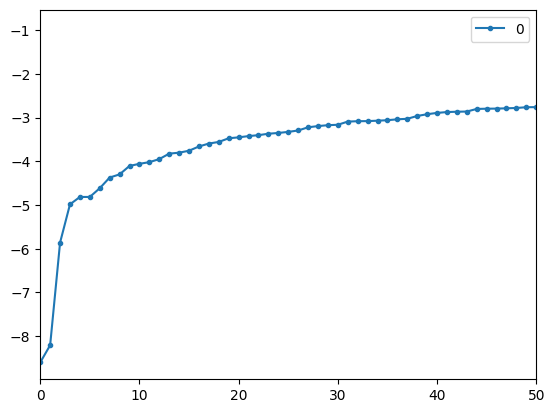

In [49]:
## threshold için eşik değerin belirlenmesi için aşağıdaki grafik kullanılabilir. bu grafikte en dik değişimin yapıldığı yer eşik değer olarak kabul edilebilir.

scores = pd.DataFrame(np.sort(df_score))
scores.plot(stacked= True, xlim=[0,50], style=".-")
plt.show()

In [56]:
## grafik yorumlandığında normal dağılım 3. indexten sonra başlıyor. 3. indexsi eşik değer belirleyebiliriz.

th = np.sort(df_score)[3]
print(th)

-4.984151747711709


In [57]:
df[df_score < th]

,carat,depth,table,price,x,y,z
41918,1.030,78.200,54.000,1262,5.720,5.590,4.420
48410,0.510,61.800,54.700,1970,5.120,5.150,31.800
49189,0.510,61.800,55.000,2075,5.150,31.800,5.120


In [58]:
df[df_score < th].index

Index([41918, 48410, 49189], dtype='int64')

In [61]:
df[df_score < th].drop(axis=0, labels=df[df_score < th].index)

,carat,depth,table,price,x,y,z


In [ ]:
## gözlem sayısı çok olan df lerde baskılama yapmak gürültü yaratır.
## gözlem sayısı az ise çoklu değişkenlere bakılarak df den çıkartma işlemi yapılabilir.